# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

import keras.backend as K
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint

# Funções Auxiliares

In [2]:
# Funções Auxiliares
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Carregando e Analisando os dados

In [3]:
X = pd.read_csv("./data/DatasetExercicio5.1.csv", sep=';')
Y = pd.read_csv("./data/Classes-Exercicio5.1.csv", sep=';')

## Amostra dos Dados

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.732337,-0.460087,0.410588,1.387655,1.549960,-0.309028,-0.119034,-1.710895,-2.103701,0.270298,-0.951528,-1.738395,2.242746,-0.062398,3.600965,0.506660,-0.351065
1,-1.697668,-3.658057,-0.067462,-0.307627,-3.257361,3.018813,0.506056,-1.943546,-0.781291,-1.054938,-0.903841,-0.971778,0.725666,-0.288371,2.136540,-0.172262,-3.538182
2,-0.009419,-2.079725,0.695339,1.395909,-1.152059,-0.149841,-1.748309,0.663311,0.243399,-0.468567,-1.793045,0.313092,0.156787,0.646463,0.872121,-0.876460,-0.159286
3,-0.955029,2.413873,-0.239355,0.296029,0.785301,-2.146341,1.792001,0.023154,-0.379947,1.025835,0.083103,1.352882,0.061962,0.043511,-1.387151,1.786397,0.813789
4,2.282446,0.764661,0.385960,-3.203398,0.165334,2.816127,-0.592895,-0.460681,1.613249,-0.383905,1.345218,0.173645,1.299997,-0.356091,-2.358184,0.142573,-1.503465


In [5]:
Y.head()

,0
0,7
1,4
2,6
3,5
4,1


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30000 non-null  float64
 1   1       30000 non-null  float64
 2   2       30000 non-null  float64
 3   3       30000 non-null  float64
 4   4       30000 non-null  float64
 5   5       30000 non-null  float64
 6   6       30000 non-null  float64
 7   7       30000 non-null  float64
 8   8       30000 non-null  float64
 9   9       30000 non-null  float64
 10  10      30000 non-null  float64
 11  11      30000 non-null  float64
 12  12      30000 non-null  float64
 13  13      30000 non-null  float64
 14  14      30000 non-null  float64
 15  15      30000 non-null  float64
 16  16      30000 non-null  float64
dtypes: float64(17)
memory usage: 3.9 MB


## Distribuição das respostas

C:\Users\hgf77\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


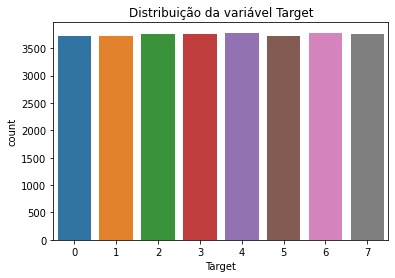

In [7]:
sns.countplot(Y['0'])
plt.title('Distribuição da variável Target')
plt.xlabel('Target')
plt.xticks()
plt.show()

## Análise de correlação

### Apesar de uma correlação forte entre algumas variáveis não conseguimos nenhuma melhora no modelo ao retirar algumas delas.

<AxesSubplot:>

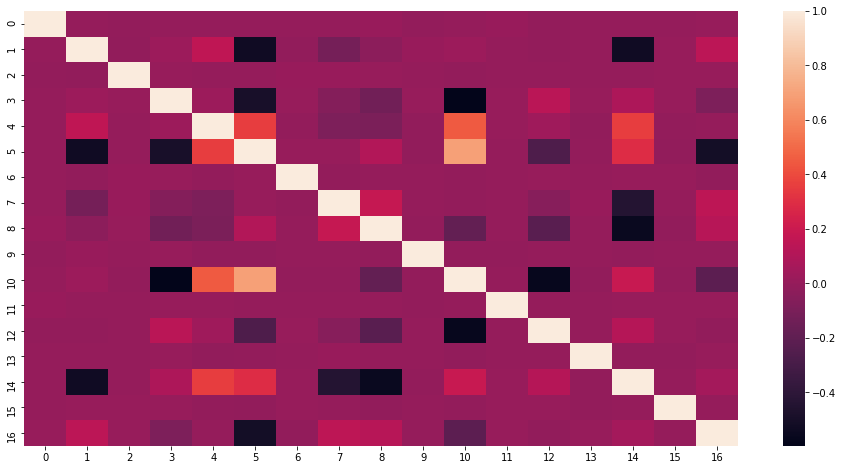

In [8]:
fig = plt.figure(figsize=(16,8))
sns.heatmap(X.corr())

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
num_features = X.shape[1]
X.shape

(30000, 17)

In [10]:
y = Y.to_numpy()
num_classes = len(np.unique(y)) # y.shape[1]
y = to_categorical(y, num_classes)
print(num_classes)
y.shape

8


(30000, 8)

In [11]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(24000, 17)

In [14]:
y_train.shape

(24000, 8)

# Modelo de MLP

In [15]:
## Criando o modelo
model = Sequential()
model.add(Dense(96, input_dim=num_features, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                1728      
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
Total params: 15,176
Trainable params: 15,176
Non-trainable params: 0
_________________________________________________________________
None


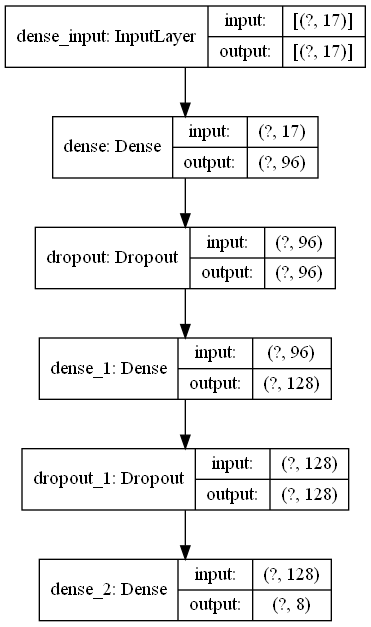

In [16]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex5_2.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=128, verbose=1, callbacks=[checkpointer])

Epoch 1/500
124/150 [=======================>......] - ETA: 0s - loss: 1.9073 - accuracy: 0.2656
Epoch 00001: val_accuracy improved from -inf to 0.42354, saving model to .\modelo_mlp_ex5_2.hdf5
150/150 [==============================] - 1s 3ms/step - loss: 1.8787 - accuracy: 0.2796 - val_loss: 1.6372 - val_accuracy: 0.4235
Epoch 2/500
142/150 [===========================>..] - ETA: 0s - loss: 1.6566 - accuracy: 0.3934
Epoch 00002: val_accuracy improved from 0.42354 to 0.49875, saving model to .\modelo_mlp_ex5_2.hdf5
150/150 [==============================] - 0s 2ms/step - loss: 1.6523 - accuracy: 0.3963 - val_loss: 1.4773 - val_accuracy: 0.4988
Epoch 3/500
113/150 [=====================>........] - ETA: 0s - loss: 1.5496 - accuracy: 0.4467
Epoch 00003: val_accuracy improved from 0.49875 to 0.54542, saving model to .\modelo_mlp_ex5_2.hdf5
150/150 [==============================] - 0s 2ms/step - loss: 1.5433 - accuracy: 0.4507 - val_loss: 1.3784 - val_accuracy: 0.5454
Epoch 4/500
128/150

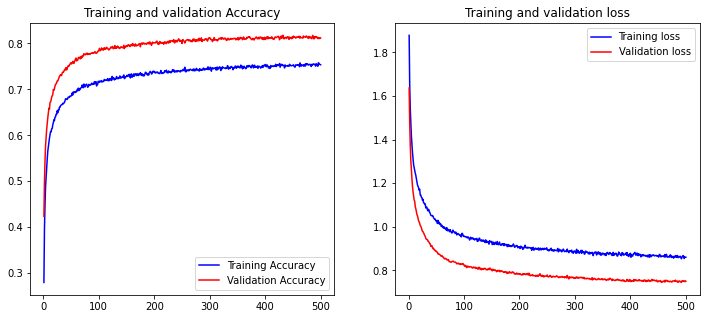

In [18]:
plot_history(history)

## Apresentando a Acurácia final do Treino, carregando o melhor modelo salvo e apresentando a Acurácia do Teste

In [19]:
scores = model.evaluate(X_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

750/750 [==============================] - 1s 1ms/step - loss: 0.6609 - accuracy: 0.8370

Acuracia do Treino: 83.7%


In [20]:
model = load_model("./modelo_mlp_ex5_2.hdf5")

In [21]:
scores = model.evaluate(X_test, y_test)
print()
print(f"Acuracia do Teste: {round(scores[1]*100,2)}%")

188/188 [==============================] - 0s 1ms/step - loss: 0.7747 - accuracy: 0.8073

Acuracia do Teste: 80.73%
